In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

In [ ]:
credit = pd.read_csv('/content/creditcard.csv')
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
print(credit.describe())

                Time             V1             V2             V3  \
count  177370.000000  177370.000000  177370.000000  177369.000000   
mean    63311.451565      -0.152199       0.029152       0.449515   
std     29595.892063       1.866278       1.613170       1.402999   
min         0.000000     -56.407510     -72.715728     -33.680984   
25%     41907.000000      -0.979840      -0.552329      -0.126927   
50%     62245.000000      -0.155746       0.100428       0.593904   
75%     80214.750000       1.191913       0.796162       1.280070   
max    123150.000000       2.439207      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  177369.000000  177369.000000  177369.000000  177369.000000   
mean        0.104782      -0.161657       0.055694      -0.074422   
std         1.379826       1.350414       1.300969       1.213530   
min        -5.519697     -42.147898     -26.160506     -43.557242   
25%        -0.760643      -0.8184

In [ ]:
print(credit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177370 entries, 0 to 177369
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    177370 non-null  float64
 1   V1      177370 non-null  float64
 2   V2      177370 non-null  float64
 3   V3      177369 non-null  float64
 4   V4      177369 non-null  float64
 5   V5      177369 non-null  float64
 6   V6      177369 non-null  float64
 7   V7      177369 non-null  float64
 8   V8      177369 non-null  float64
 9   V9      177369 non-null  float64
 10  V10     177369 non-null  float64
 11  V11     177369 non-null  float64
 12  V12     177369 non-null  float64
 13  V13     177369 non-null  float64
 14  V14     177369 non-null  float64
 15  V15     177369 non-null  float64
 16  V16     177369 non-null  float64
 17  V17     177369 non-null  float64
 18  V18     177369 non-null  float64
 19  V19     177369 non-null  float64
 20  V20     177369 non-null  float64
 21  V21     17

In [ ]:
credit['Class'] = credit['Class'].astype('category')

In [ ]:
print(credit.isnull().sum())

Time      0
V1        0
V2        0
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [ ]:
data = credit.dropna()

In [ ]:
X = data.drop(columns=['Class'])
y = data['Class']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=123, stratify=y)

In [ ]:
minority_class_samples = y_train.value_counts().min()
k_neighbors = min(minority_class_samples - 1, 5)  # Use min(minority_class_samples - 1, 5) as a safe default

smote = SMOTE(random_state=123, k_neighbors=k_neighbors)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [ ]:
logistic_model = LogisticRegression(random_state=123)
logistic_model.fit(X_train_balanced, y_train_balanced)

LogisticRegression(random_state=123)

In [ ]:
y_pred = logistic_model.predict(X_test)
y_prob = logistic_model.predict_proba(X_test)[:, 1]

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     35401
         1.0       0.08      0.89      0.14        73

    accuracy                           0.98     35474
   macro avg       0.54      0.93      0.57     35474
weighted avg       1.00      0.98      0.99     35474



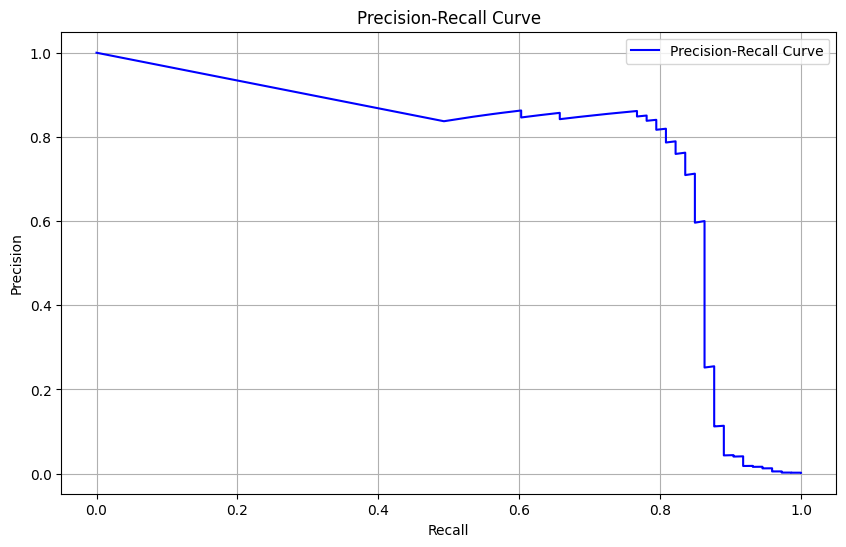

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='b', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()